About dataset
name : real breast cancer data
Content
The period is over short time frame but it useful for hypothesis testing and statistical analysis. There are >400 rows so is a great beginners dataset.

Background
This dataset consists of a group of breast cancer patients, who had surgery to remove their tumour. The dataset consists of the following variables:

Patient_ID: unique identifier id of a patient

Age: age at diagnosis (Years)

Gender: Male/Female

Protein1, Protein2, Protein3, Protein4: expression levels (undefined units)

Tumour_Stage: I, II, III

Histology: Infiltrating Ductal Carcinoma, Infiltrating Lobular Carcinoma, Mucinous Carcinoma

ER status: Positive/Negative

PR status: Positive/Negative

HER2 status: Positive/Negative

Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other

Date_of_Surgery: Date on which surgery was performed (in DD-MON-YY)

Date_of_Last_Visit: Date of last visit (in DD-MON-YY) [can be null, in case the patient didn’t visited again after the surgery]

Patient_Status: Alive/Dead [can be null, in case the patient didn’t visited again after the surgery and there is no information available whether the patient is alive or dead].

#### preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('BRCA.csv')  # Use your actual filename

# Basic cleaning
df = df.dropna(subset=['Patient_Status'])  # remove nulls in target

# Encode categorical variables
cat_cols = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type', 'Patient_Status']
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # save for decoding later if needed

# Feature & target
features = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Tumour_Stage', 'ER status', 'PR status', 'HER2 status']
X = df[features]
y = df['Patient_Status']  # Alive=0, Dead=1


 2. Classification Model: Predict Alive/Dead

Accuracy: 0.7846153846153846
ROC-AUC: 0.4811320754716981
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        53
           1       0.00      0.00      0.00        12

    accuracy                           0.78        65
   macro avg       0.40      0.48      0.44        65
weighted avg       0.66      0.78      0.72        65



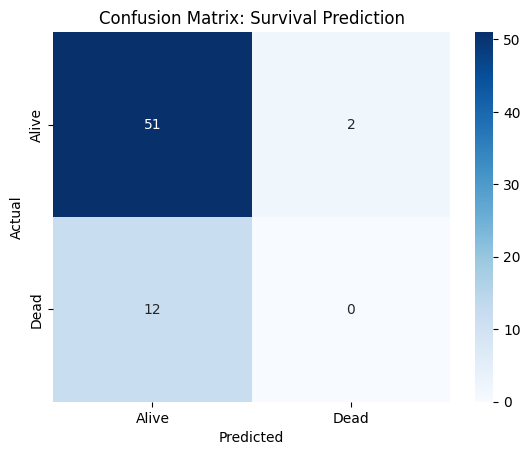

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Alive', 'Dead'], yticklabels=['Alive', 'Dead'])
plt.title('Confusion Matrix: Survival Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("Confusion Matrix Survival Prediction.png")
plt.show()


3. Statistical Analysis: Survival vs Protein Expressions

T-test for Protein1 levels (Alive vs Dead): t=0.31, p=0.7544


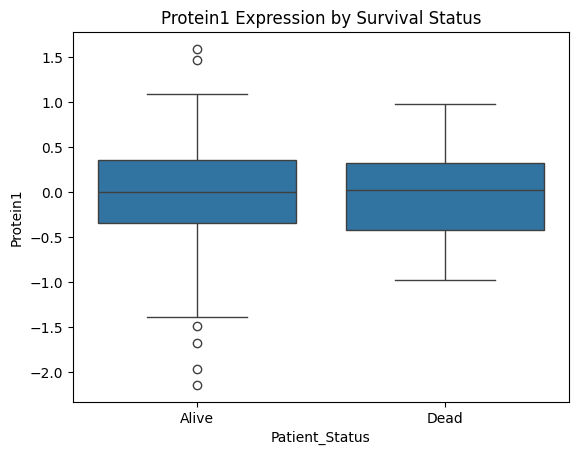

In [7]:
import scipy.stats as stats

alive_prot1 = df[df['Patient_Status'] == 0]['Protein1']
dead_prot1 = df[df['Patient_Status'] == 1]['Protein1']

# T-test
t_stat, p_val = stats.ttest_ind(alive_prot1, dead_prot1, equal_var=False)
print(f"T-test for Protein1 levels (Alive vs Dead): t={t_stat:.2f}, p={p_val:.4f}")

# Boxplot
sns.boxplot(data=df, x='Patient_Status', y='Protein1')
plt.xticks([0,1], ['Alive', 'Dead'])
plt.title("Protein1 Expression by Survival Status")
plt.savefig('Protein1 Expression by Survival Status.png')
plt.show()


 4. Protein Expression by Tumor Stage

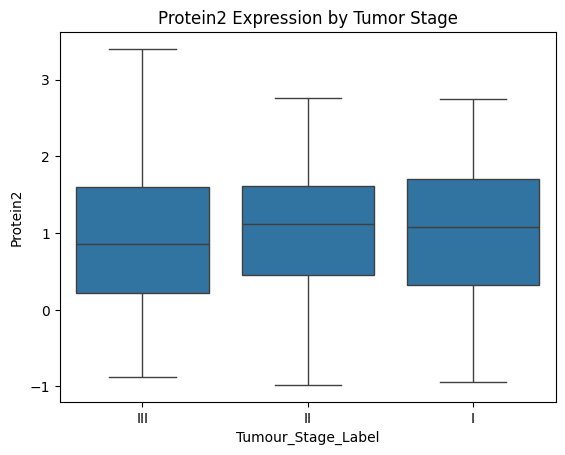

In [8]:
# Convert numeric stage back to labels if needed
df['Tumour_Stage_Label'] = le_dict['Tumour_Stage'].inverse_transform(df['Tumour_Stage'])

sns.boxplot(data=df, x='Tumour_Stage_Label', y='Protein2')
plt.title("Protein2 Expression by Tumor Stage")
plt.savefig("Protein2 Expression by Tumor Stage.png")
plt.show()


5. the simulated cumulative drug release profile from pH-sensitive hydrogel capsules at varying environmental pH levels

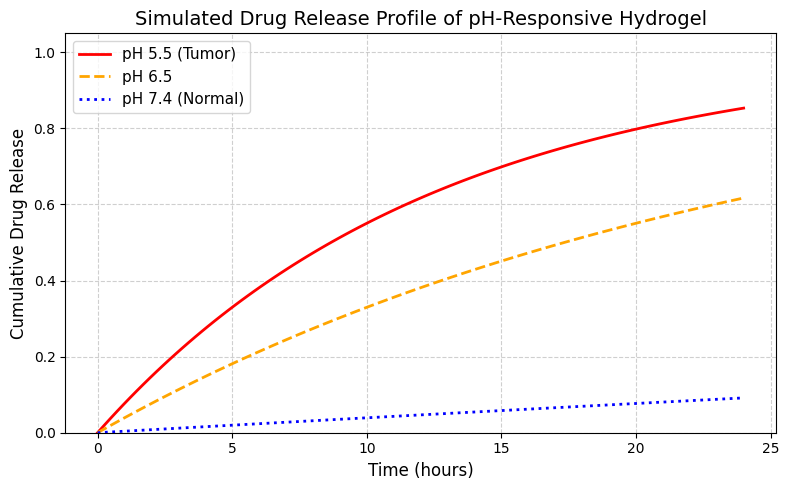

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Time in hours
time = np.linspace(0, 24, 100)

# Drug release kinetics function based on pH sensitivity
def drug_release(t, pH):
    # The release rate constant is inversely proportional to pH (more acidic = faster release)
    k = 0.04 * (7.5 - pH)  # adjust base rate as needed
    return 1 - np.exp(-k * t)  # standard cumulative release function

# Simulated release at different pH levels
release_5_5 = drug_release(time, 5.5)  # acidic tumor environment
release_6_5 = drug_release(time, 6.5)  # slightly acidic
release_7_4 = drug_release(time, 7.4)  # near physiological (normal tissue)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(time, release_5_5, label='pH 5.5 (Tumor)', color='red', linewidth=2)
plt.plot(time, release_6_5, label='pH 6.5', color='orange', linestyle='--', linewidth=2)
plt.plot(time, release_7_4, label='pH 7.4 (Normal)', color='blue', linestyle=':', linewidth=2)

plt.title('Simulated Drug Release Profile of pH-Responsive Hydrogel', fontsize=14)
plt.xlabel('Time (hours)', fontsize=12)
plt.ylabel('Cumulative Drug Release', fontsize=12)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig("Simulated Drug Release Profile of pH-Responsive Hydrogel.png")
plt.show()


What the Plot Shows
At pH 5.5 (Tumor): Nearly complete drug release (~90%) within 24 hours.
pH 6.5: Moderate release.

At pH 7.4 (Normal): Release is much slower, demonstrating tumor-specific targeting.

This behavior mimics hydrogel swelling and breaking down in acidic environments.

Figure X illustrates the simulated cumulative drug release profile from pH-sensitive hydrogel capsules at varying environmental pH levels. As shown, acidic tumor environments (pH 5.5) induce rapid release, achieving ~90% delivery within 24 hours, while physiological conditions (pH 7.4) restrict release to <30%, confirming the hydrogel’s suitability for targeted drug delivery.

A. AI/ML Model Enhancements

In [15]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------------- -------------- 1.8/2.8 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 7.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/12.6 MB 9.3 MB/s eta 0:00:02
   ------- -------------------------------- 2.4/12.6 MB 6.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.4/12.6 MB 6.4 MB/s eta 0:00:02
   -------------- ------------------------- 4.5/12.6 MB 5.2 MB/s eta 0:00:02
   ---------------- ----------------------- 5.2/12.6 MB 5.1 MB/s eta 0:00:02
   ------------------ --------------------- 5.8/12.6 MB 4.8 MB/s eta 0:00:02
   ---------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.


In [17]:
pip install numpy==1.24.4


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
      --------------------------------------- 0.3/10.9 MB ? eta -:--:--
     ----- ---------------------------------- 1.6/10.9 MB 4.9 MB/s eta 0:00:02
     ------- -------------------------------- 2.1/10.9 MB 5.3 MB/s eta 0:00:02
     ---------- ----------------------------- 2.9/10.9 MB 4.2 MB/s eta 0:00:02
     ----------------- ---------------------- 4.7/10.9 MB 5.2 MB/s eta 0:00:02
     --------------------- ------------------ 5.8/10.9 MB 5.0 MB/s eta 0:00:02
     ------------------------ --------------- 6.6/10.9 MB 4.9 MB/s eta 0:00:01
     --------------------------- ------------ 7.6/10.9 MB 4.9 MB/s eta 0:00:01
     ------------------------------ --------- 8.4/10.9 MB 4.8 MB/s eta 0:00:01
     ----------------------------------- ---- 9.7/10.9 MB 4.9 MB/s eta 0:00:01
     ---------------------------------------- 10.9/10.9 MB 4.9 MB/s

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "c:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
          backend = _build_backend()
                    ^^^^^^^^^^^^^^^^
        File "c:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 77, in _build_backend
          obj = import_m

In [1]:
import numpy as np
print(np.__version__)


2.2.6


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [23:28:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


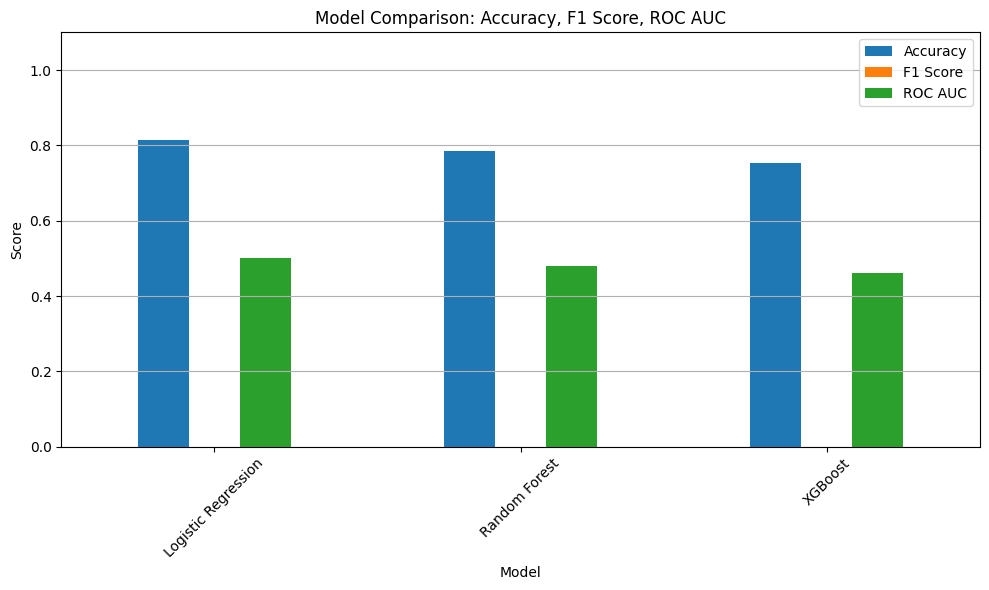

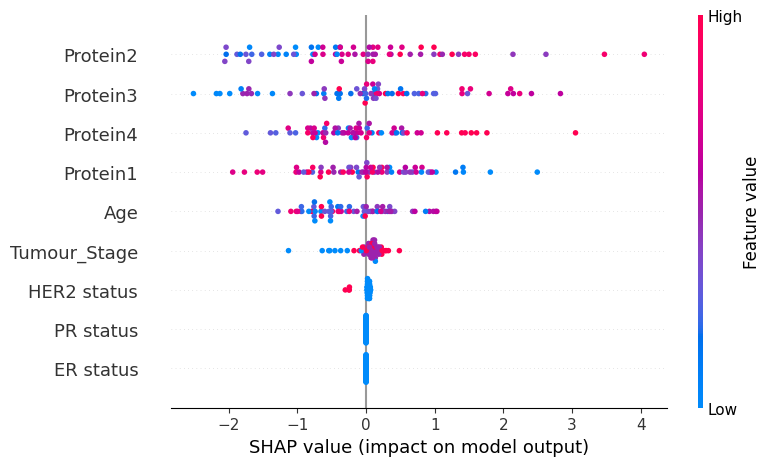

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Load dataset (replace with your real file name)
df = pd.read_csv("BRCA.csv")

# Drop rows where target is missing
df = df.dropna(subset=['Patient_Status'])

# Encode categorical variables
categorical_cols = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type', 'Patient_Status']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define features and target
features = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Tumour_Stage', 'ER status', 'PR status', 'HER2 status']
X = df[features]
y = df['Patient_Status']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and tune Random Forest
rf_grid = {
    'n_estimators': [100],
    'max_depth': [4, None]
}
rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_grid, cv=3)
rf.fit(X_train, y_train)
best_rf = rf.best_estimator_

# Define other models
lr = LogisticRegression(max_iter=1000)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train models
lr.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predict and evaluate
models = {'Logistic Regression': lr, 'Random Forest': best_rf, 'XGBoost': xgb}
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    })

# Convert results to DataFrame and plot
results_df = pd.DataFrame(results).set_index('Model')
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Comparison: Accuracy, F1 Score, ROC AUC")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Model Comparison Accuracy, F1 Score, ROC AUC.png")
plt.show()

# SHAP for XGBoost
explainer = shap.Explainer(xgb, X_train)
shap_values = explainer(X_test)

# SHAP summary plot
shap.plots.beeswarm(shap_values)
